# Pre - Processing Data

In this stage is about preparing data
* Normalization

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Breast-Cancer-Wisconsin-data.csv")
df.head()

,Unnamed: 0,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Nromal Nucleoli,Mitoses,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
print("the shape of the dataframe: {}".format(df.shape))

the shape of the dataframe: (699, 12)


In [7]:
df.dtypes

Unnamed: 0                     int64
Id                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Nromal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'Id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Nromal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Select the features:
* clump thickness
* Uniformity of cell size
* Uniformity of cell shape
* Marginal Adhesion
* single ephitelial cell size
* Bare nuclei
* Bland Chromatin
* Normal nuicleoli
* Mitoses

Classes (Target)
* Class

In [9]:
x = np.asanyarray(df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
                     'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Nromal Nucleoli', 'Mitoses']])
y = np.asanyarray(df["Class"])

print(x[0:5])
print(y[0:5])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]
[2 2 2 2 2]


In [12]:
#Labels class
print(np.unique(y))

[2 4]


**Data normalization**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
standard = StandardScaler()

X_standard = standard.fit_transform(x)

print(X_standard[0:5])

[[ 0.20693572 -0.69999505 -0.74329904 -0.63324716 -0.54956136 -0.69138016
  -0.17966213 -0.61182504 -0.34391178]
 [ 0.20693572  0.28384518  0.2668747   0.76862067  1.71010564  1.78554046
  -0.17966213 -0.28411186 -0.34391178]
 [-0.50386559 -0.69999505 -0.74329904 -0.63324716 -0.54956136 -0.41616676
  -0.17966213 -0.61182504 -0.34391178]
 [ 0.56233637  1.59563215  1.61377302 -0.63324716 -0.09762796  0.13426004
  -0.17966213  1.35445405 -0.34391178]
 [-0.14846494 -0.69999505 -0.74329904  0.06768675 -0.54956136 -0.69138016
  -0.17966213 -0.61182504 -0.34391178]]


In [13]:
from sklearn.model_selection import train_test_split

Split the data into Training & test datasets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state = 4)

print("the shape of the training set: {}".format(X_train.shape))
print("the shape of the test set: {}".format(X_test.shape))

the shape of the training set: (524, 9)
the shape of the test set: (175, 9)


## Data Modeling

* Logistic Regression
* Decision Tree
* K Nearest Neighbors
* Support vector machines

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(C = 0.01, solver = "liblinear")
lr

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
#fit the model
lr.fit(X_train, y_train)

#Predict with the model
y_hat_lr = lr.predict(X_test)

print("The original values: {}".format(y_test[:5]))
print("The predicted values: {}".format(y_hat_lr[:5]))

The original values: [4 2 2 4 2]
The predicted values: [4 2 2 4 2]


**Accuracy evaluation**

In [32]:
from sklearn.metrics import jaccard_score, log_loss

In [33]:
idx_jaccard_lr = jaccard_score(y_test, y_hat_lr, pos_label = 2)
acc_log_loss = log_loss(y_test, lr.predict_proba(X_test))

print("the jaccard score: {}".format(idx_jaccard_lr))
print("the Logarithmic Loss: {}".format(acc_log_loss))

the jaccard score: 0.9655172413793104
the Logarithmic Loss: 0.16170842108360173


### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
#fit the model
dt.fit(X_train, y_train)

#Predict with the model
y_hat_dt = dt.predict(X_test)

#Result
print("The original values: {}".format(y_test[0:5]))
print("The predicted values: {}".format(y_hat_dt[0:5]))

#Accuracy 
acc_dt = accuracy_score(y_test, y_hat_dt)
print("The accuracy of the model Decision Tree: {}".format(acc_dt))

The original values: [4 2 2 4 2]
The predicted values: [4 2 2 4 2]
The accuracy of the model Decision Tree: 0.96


**visualization Decision Tree**

In [44]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline 

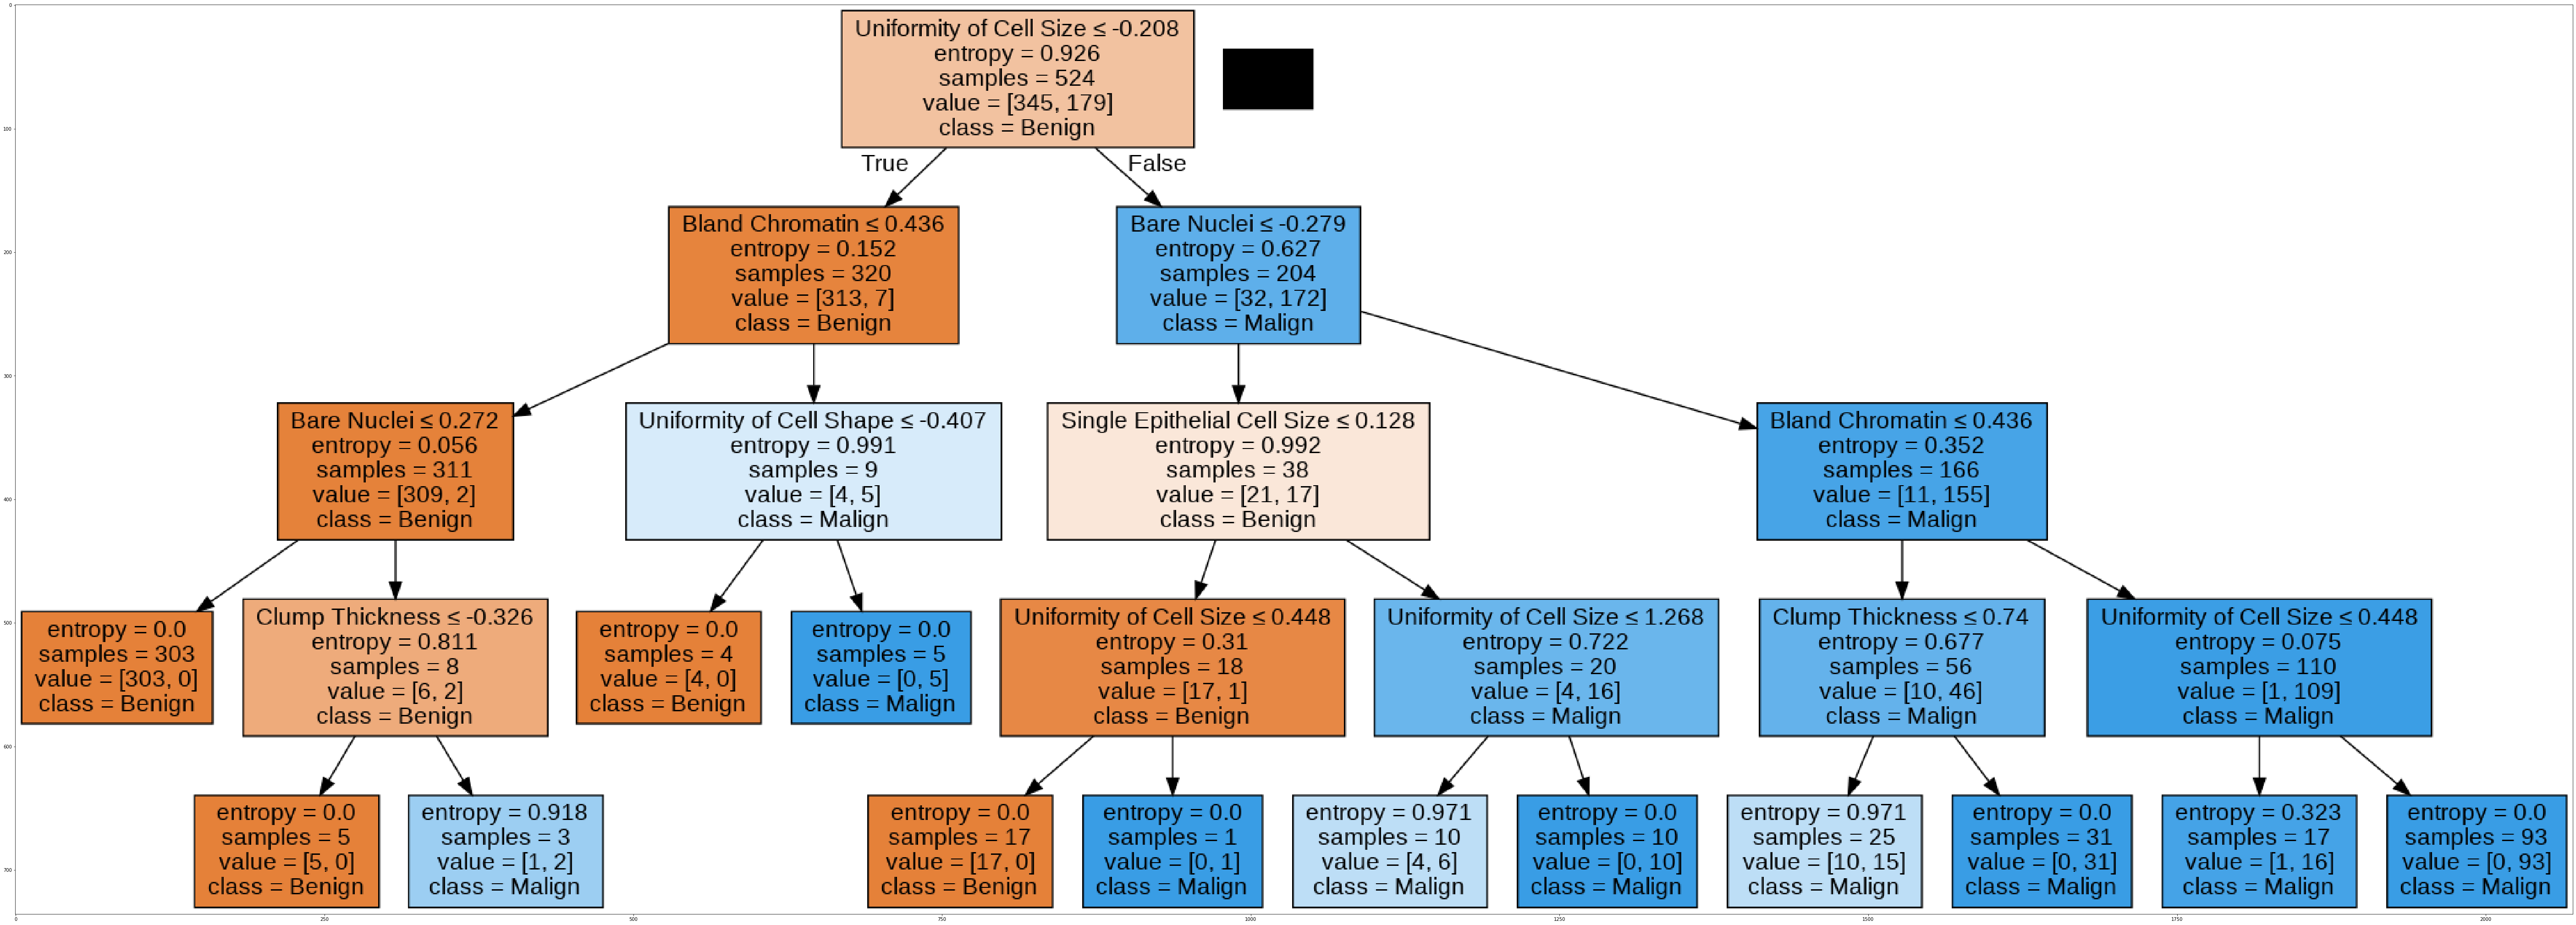

In [45]:
dot_data = StringIO()
filename = "Cancer_tree.png"
featureNames = df.columns[2:11]
out = tree.export_graphviz(dt, feature_names = featureNames, out_file = dot_data, class_names = ["Benign", "Malign"], filled = True,  
                         special_characters = True, rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### K nearest Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#Create the model
knn = KNeighborsClassifier(n_neighbors = 2)

#Fit the model
knn.fit(X_train, y_train)

#Predict with the model
y_hat_knn = knn.predict(X_test)

#Verify the model
print("The original values: {}".format(y_test[0:5]))
print("The predicted values: {}".format(y_hat_knn[0:5]))

#Accuracy of the model
acc_knn_train = accuracy_score(y_train, knn.predict(X_train))
acc_knn_test = accuracy_score(y_test, y_hat_knn)

print("The Training accuracy: {}".format(acc_knn_train))
print("The Test accuracy: {}".format(acc_knn_test))

The original values: [4 2 2 4 2]
The predicted values: [4 2 2 2 2]
The Training accuracy: 0.9694656488549618
The Test accuracy: 0.9428571428571428


### Support vector Machine

In [49]:
from sklearn import svm
from sklearn.metrics import f1_score

In [50]:
#create the model
clf = svm.SVC(kernel = "rbf")

#train the model
clf.fit(X_train, y_train)

#Predict with the model
y_hat_svm = clf.predict(X_test)

#Verify the result
print("the original values: {}".format(y_test[0:5]))
print("the predicted values: {}".format(y_hat_svm[0:5]))

#Accuracy
acc_svm_f1 = f1_score(y_test, y_hat_svm, average = "weighted")
acc_svm_jaccard = jaccard_score(y_test, y_hat_svm, pos_label = 2)

print("the SVM f1 accuracy: {}".format(acc_svm_f1))
print("the svm jaccard accuracy: {}".format(acc_svm_jaccard))

the original values: [4 2 2 4 2]
the predicted values: [4 2 2 4 2]
the SVM f1 accuracy: 0.9828252160432238
the svm jaccard accuracy: 0.9739130434782609


### visualizing the results with confusion Matrix

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

**Logistic Regression**

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       113
           4       0.98      0.95      0.97        62

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175

Confusion matrix, without normalization
[[112   1]
 [  3  59]]


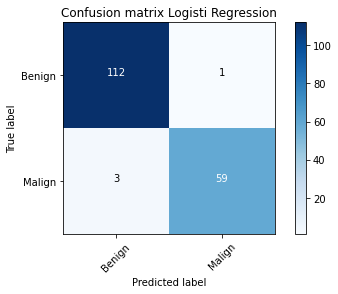

In [60]:
# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_test, y_hat_lr, labels = [2, 4])
np.set_printoptions(precision = 2)

print (classification_report(y_test, y_hat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes = ['Benign','Malign'],normalize = False,  title = 'Confusion matrix Logisti Regression')

**Decision Trees**

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       113
           4       0.95      0.94      0.94        62

    accuracy                           0.96       175
   macro avg       0.96      0.95      0.96       175
weighted avg       0.96      0.96      0.96       175

Confusion matrix, without normalization
[[110   3]
 [  4  58]]


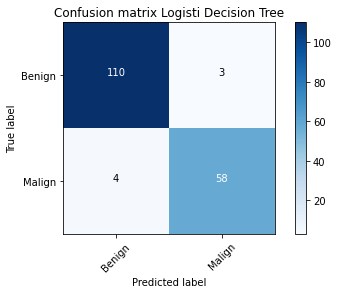

In [61]:
# Compute confusion matrix
cnf_matrix_dt = confusion_matrix(y_test, y_hat_dt, labels = [2, 4])
np.set_printoptions(precision = 2)

print(classification_report(y_test, y_hat_dt))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes = ['Benign','Malign'],normalize = False,  title = 'Confusion matrix Logisti Decision Tree')

**K Nearest Neighbors**

              precision    recall  f1-score   support

           2       0.93      0.99      0.96       113
           4       0.98      0.85      0.91        62

    accuracy                           0.94       175
   macro avg       0.95      0.92      0.94       175
weighted avg       0.95      0.94      0.94       175

Confusion matrix, without normalization
[[112   1]
 [  9  53]]


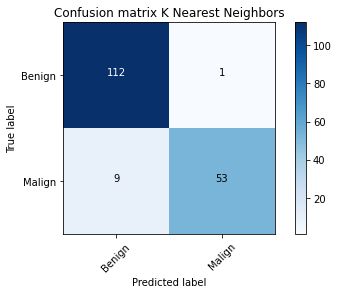

In [62]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(y_test, y_hat_knn, labels = [2, 4])
np.set_printoptions(precision = 2)

print (classification_report(y_test, y_hat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes = ['Benign','Malign'],normalize = False,  title = 'Confusion matrix K Nearest Neighbors')

**Support Vector Machines**

              precision    recall  f1-score   support

           2       0.98      0.99      0.99       113
           4       0.98      0.97      0.98        62

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

Confusion matrix, without normalization
[[112   1]
 [  2  60]]


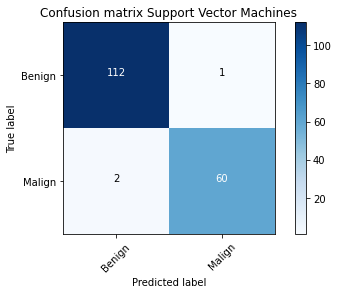

In [63]:
# Compute confusion matrix
cnf_matrix_svm = confusion_matrix(y_test, y_hat_svm, labels = [2, 4])
np.set_printoptions(precision = 2)

print (classification_report(y_test, y_hat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes = ['Benign','Malign'],normalize = False,  title = 'Confusion matrix Support Vector Machines')